# Importing

Here we are importing all the Neccessary libaries required for all the utility functions and all of the code below

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy import optimize

# Logistic Regression

we use logistic regression for binary classification , for those outputs are discrete ( 0 , 1 ) and it belongs to two classes in total.Logistic Regression only outputs the probablity values that features may belong the given categories ( 0 ,1 ).
## First order Optimization

In first order optimization method we will use the jacovian matrix to update the *weights* and *bias* values.
$$
\begin{align}
w_\theta &= w_\theta old - \mathcal{V} * w_\theta^` \qquad , \mathcal{V} = \space \text{learning rate (0 to 1) } \\
b_\theta &= b_\theta old - \mathcal{V} * b_\theta^` 
\end{align}
$$

This is a helper function to load dataset


In [2]:
def load_data(url):
    df=pd.read_csv(url,header=None);
    return ( df.iloc[:,:-1] , df.iloc[:,-1])

we are using `Sigmoid funtion` for activation . which takes input from - $\infty$ to $\infty$ and outputs from $0$ to $1$ . which is very usefull to find probability values.

$$
\begin{align}
\sigma = \frac{1}{1+e^{-x}}
\end{align}
$$

In [3]:
def sigmoid(x):
    '''
    returns sigmoid h(x)= 1/(e^-x + 1) of the input x
    '''
    return 1/(1+np.exp(-x))

this `utility function` checks the gradient descent has converged , if converged we will stop the gradient descent training .
So convergence is checked by finding the difference between the *old* $w_\theta$ and *new* $w_\theta$ if there is'nt any much of difference then its converged.

In [4]:
def check_for_convergence(beta_old,beta_new,tol=1e-3):
    '''
    Checks whether the coefficients have converged in the l-infinity norm.
    Returns True if they have converged, False otherwise.'''
    #calculate the change in the coefficients
    coef_change = np.abs(beta_old - beta_new)
    
    #if change hasn't reached the threshold and we have more iterations to go, keep training
    return not (np.any(coef_change>tol) )

<h3> Loss Function :</h3>	
					
$$
Cost / Loss =
 \begin{cases}
 -log(h_{\theta}(x)) & \text{if $y$ is 1} \\
 -log(1-h_{\theta}(x)) & \text{if $y$ is 0}
 \end{cases}
$$

Which can be simplified as below ,

$$
loss = \frac{1}{m}(-ylog(h_{\theta}(x) \ -(1-y)( \ log(1-h_{\theta}(x) \ ) \ ) \ ) 
$$

where hypothesis $h_\theta(x)$ ,
                $$ h_\theta(x) =  \sigma(\theta^T x)$$

 let's check this figure below and see how the Cost / Loss function works .

 when $y = 1$ , we plotting $-log(h(x))$

![mtVFHjoeQkaNuKP](https://i.loli.net/2019/08/27/mtVFHjoeQkaNuKP.png)

if $h(x)$ is close to $1$ , cost is so low wherelse when $h(x)$ is close to 0 , cost is so high 

When $y=0$ , we plotting $-log(1-h(x))$

![EumjY89IzUcVh1S](https://i.loli.net/2019/08/27/EumjY89IzUcVh1S.png)

if $h(x)$ is close to $0$ , cost is so low wherelse when $h(x)$ is close to $1$ , cost is so high , make sense now !

The Deriavative of loss function is below ,

$$ \frac{\partial loss}{\partial w} = \frac{(h_\theta(x) - y)x^T}{m} $$



#### Learning parameters using `scipy.optimize`

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy is a numerical computing library for `python`. It provides an optimization module for root finding and minimization. As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:
- `costFunction`: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.
- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- `method`: Optimization method/algorithm to use
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

If you have completed the `costFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using `optimize.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `optimize.minimize`: you only needed to provide a function calculating the cost and the gradient.

In the following, we already have code written to call `optimize.minimize` with the correct arguments.

In [5]:
def costFunction(theta, X, y):

    m = y.size  # number of training examples

    J = 0

    h = sigmoid(X.dot(theta.T)) # sigmoid function 
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

### Let's just visualize the data point 
 to check how they look . For that we have a utility function called `plot_data` that takes care of the visualization part

In [114]:
def plot_data(X,y):
    
    ones = X[y==1] # features X where y == 1
    zeros = X[y==0] # features X where y == 0
    
    plt.scatter(ones[0],ones[1] , label="1's ")
    plt.scatter(zeros[0],zeros[1], label="0's ")

    plt.legend(loc="upper right")

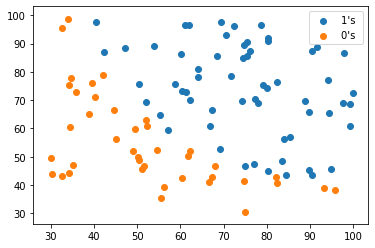

In [115]:
X , y = load_data('./marks.txt')
plot_data(X,y)    
plt.show()

this utility function returns the best *theta values* by combining the `costFunction` which returns the cost error , gradient of the error function and `scipy.minimize` which converges at the global minima 

In [8]:
def get_theta(costFunction , X , y , iter = 400):

    options = {'maxiter':iter} # maximum number of iterations 

    row , col = X.shape

    initial_theta = np.zeros(col)

    res = optimize.minimize(
        costFunction, 
        initial_theta ,
        (X,y),
        jac=True,
        method='TNC',
        options = options
    )
    # the fun property of `OptimizeResult` object returns
    # the value of costFunction at optimized theta
    cost = res.fun

    # the optimized theta is in the x property
    theta = res.x

    return ( cost , theta )

### Decision Line

So how get the logistic regression model decides whether the features X belong to either $0$ or $1$ <br>
- `0`: when $\sigma (x.w_\theta + b) < 0.5$
- `1`: when $\sigma (x.w_\theta + b ) >= 0.5$ 
<br>

So , $0.5$ here is the decision line that whether feature X belongs to either $0$ or $1$ so ,

$$
\begin{align}
x.w_\theta + b &= \sigma^{-1} (0.5) \\
x.w_\theta + b &= 0 \\
x_0 * w_0 +  x_1 * w_1 + b &= 0 \\ 
x_0 * w_0 &=  - ( x_1 * w_1 + b )  \\
x_0 &= - \frac{( x_1 * w_1 + b )}{w_0}  \\
\end{align}
$$

cost => 0.2034977015894746 , theta => [-25.16131863   0.20623159   0.20147149]


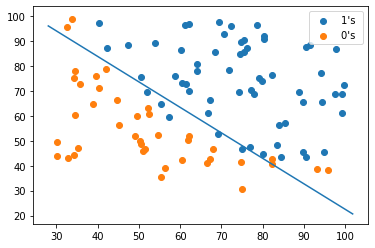

In [9]:
ones = X[y==1] # features X where y == 1
zeros = X[y==0] # features X where y == 0
row , col = X.shape
# Add intercept term to X
X = np.concatenate([np.ones((row, 1)), X], axis=1)
# get cost , theta values to plot the threshold 0.5 that decides where the feature X belongs to class A or B
(cost,theta)=get_theta(costFunction , X , y )

print('cost => {} , theta => {}'.format(cost,theta) )
#print(' x ',X[:,1:3]) # prints col 0 , 1 
# calculate min of X - 2 , max of X + 2 
x_treme = np.array([ np.min(X[:,1]) - 2 , np.max(X[:,1]) + 2 ]) 
# calculate y extreme 
#y_treme = (-1. / theta[2]) * ( theta[1] * x_treme + theta[0] )

'''

b  = theta[0]
w1 = theta[1]
w0 = theta[2]

'''
y_treme = - (( np.dot(theta[1] ,x_treme) ) + theta[0] ) / theta[2] 

plt.plot(x_treme , y_treme)

plt.scatter(ones[0],ones[1] , label="1's ")
plt.scatter(zeros[0],zeros[1], label="0's ")

plt.legend(loc="upper right")
plt.show()

In the function `mapFeature` defined in the file `utils.py`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting.we will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [10]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

lets visualize this dataset which is not linearly separable unlike the dataset that we have used earlier

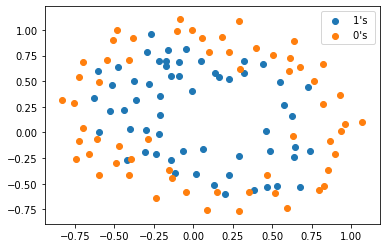

In [124]:
X , y = load_data('ex2data2.txt')
plot_data(X,y)
plt.show()

###  Regularization:
There are two Regularization methods :
 - L2 Norm : sumation of `absolute values` of the vector ( $ \sum_{i=1}^n \theta_i^2 $ )
 - L1 Norm : sumation of `squared root of squared values` of the vector ( $ \sum_{i=1}^n | \theta_i | $ )
 
we'll use `L2 Norm` as our regulization method
$$
\begin{align}
loss &= \frac{1}{m} \left[-ylog\left(h_{\theta} \left(x\right) \right) \ -\left(1-y\right)( \log\left( 1-h_{\theta}(x) \right) \right] + \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2 \\
\frac{loss}{\partial \theta} &=  \frac{ \left(h_\theta\left(x\right) - y\right)x^T}{m} + \frac{\lambda}{m} \sum_{i=1}^n \theta_i
\end{align}
$$


In [69]:
def costFunctionNorm_2(theta, X, y,lambda_=1):
    #print('CostFunction Norm 2')
    m = y.size  # number of training examples
    
    J = 0

    h = sigmoid(X.dot(theta.T)) # sigmoid function 
    temp = theta
    temp[0] = 0
    J =   (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + ( (lambda_ / (2*m) )  * np.sum(np.square(temp)) )
    grad = ( (1 / m) * (h - y).dot(X) ) 
    grad = grad + (lambda_ /m) * temp
    
    return J, grad

In [127]:
def get_theta_reg_2(costFunction , X , y , iter = 160):

    options = {'maxiter':iter} # maximum number of iterations 

    row , col = X.shape
    
    lambda_ = 1.00
    
    initial_theta = np.zeros(col)

    res = optimize.minimize(
        costFunction, 
        initial_theta ,
        (X,y,lambda_),
        jac=True,
        method='TNC',
        options = options
    )
    # the fun property of `OptimizeResult` object returns
    # the value of costFunction at optimized theta
    cost = res.fun

    # the optimized theta is in the x property
    theta = res.x

    return ( cost , theta )

In [125]:
ones = X[y==1]
zeros = X[y==0] # features X where y == 0
print(X.shape)
X = mapFeature(X[0], X[1])
print(X.shape)

(118, 2)
(118, 28)


In [74]:
rol , col = X.shape
theta = np.ones(col)
(cost , theta ) = costFunctionNorm_2(theta, X, y,lambda_=1)
print('cost=> ',cost)
print('theta=> ',theta)

cost=>  2.1348483146658572
theta=>  [0.34604507 0.08508073 0.11852457 0.1505916  0.01591449 0.16811439
 0.06712094 0.03217053 0.02604321 0.10719727 0.09725885 0.01098433
 0.04195657 0.00957212 0.12367776 0.05895534 0.01870409 0.01729323
 0.02352665 0.01513039 0.09858123 0.07328323 0.01051447 0.02270567
 0.00904832 0.02563548 0.00823079 0.10601204]


cost =>  0.6544877952479263
theta =>  [ 0.         -0.00602678  0.39178171 -0.45600964 -0.16345792 -0.14868217
 -0.08286216 -0.05165688 -0.07950304 -0.03803833 -0.39959037 -0.02030656
 -0.1246764  -0.04280453 -0.27166959 -0.14715523 -0.04113254 -0.02632121
 -0.05234921 -0.05335967 -0.18084988 -0.3162826  -0.00485563 -0.06747121
 -0.00138271 -0.07169554 -0.01909383 -0.29410679]
min => -18.981540721177556 , max => 0.13261799669806132


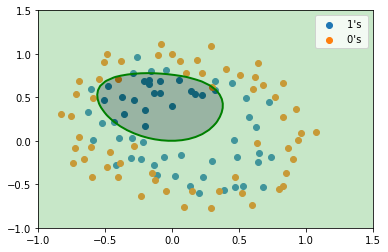

In [128]:
row , col = X.shape
# Add intercept term to X
#X = np.concatenate([np.ones((row, 1)), X], axis=1)
# get cost , theta values to plot the threshold 0.5 that decides where the feature X belongs to class A or B
(cost,theta)=get_theta_reg_2(costFunctionNorm_2 , X , y )

print('cost => ',cost)
print('theta => ',theta)

plt.scatter(ones[0],ones[1] , label="1's ")
plt.scatter(zeros[0],zeros[1], label="0's ")
plt.legend(loc="upper right")


u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((u.size, v.size))
# Evaluate z = theta*x over the grid
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(mapFeature(ui, vj), theta)

z = z.T  # important to transpose z before calling contour

plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
print('min => {} , max => {}'.format(np.min(z) , np.max(z) ) )
plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
